In [1]:
from preprocessing_last20 import *
from encoder import Encoder
from decoder import Decoder
from classifier import FaceRecognizer
import torch.optim as optim
from torch import nn

# device = torch.device('cuda:3')
device = torch.device('cpu')
encoder = Encoder().to(device) # input 64*64 image, output 128 feacture vector
decoder = Decoder().to(device) # input 128 feature vector, output 64*64 image
classifier = FaceRecognizer().to(device)
attack_targets = torch.tensor([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]).to(device)

In [2]:
encoder.load_state_dict(torch.load('train_VAE_last20encoder.pt'))
decoder.load_state_dict(torch.load('train_VAE_last20decoder.pt'))
classifier.load_state_dict(torch.load('classifier.pt'))

<All keys matched successfully>

In [5]:
avg = 0
for i in range(train_data.shape[0]):
    avg += train_data[i].detach()
avg = avg/train_data.shape[0]
avg.shape

torch.Size([1, 1, 64, 64])

In [19]:
def optimize_z(z, decoder, classifier, optimizer_z, criterion, target, reg):
    decoder.eval()
    classifier.eval()
    optimizer_z.zero_grad()
    generated = decoder(z)
    result = classifier(generated)
    loss = criterion(result,attack_targets[target])
    loss += torch.sum((generated-avg)**2) * reg
    loss.backward()
    optimizer_z.step()
    return loss.item()
    

In [20]:
def optimize_z_eps(z, eps, lr, reg, lr_decay, target=8):
    for epoch in range(eps): 
        optimizer_z = optim.SGD([z], lr=lr*lr_decay**epoch, momentum=0.9, nesterov=False)
        criterion = nn.CrossEntropyLoss(reduction = 'sum')
        epoch_loss = optimize_z(z, decoder, classifier, optimizer_z, criterion, target, reg)
        print("loss(generator): ", epoch_loss)
        if epoch%200 == 0:
            tensor_to_picture(decoder(z).detach().cpu().numpy()[0][0])

loss(generator):  16.8178768157959


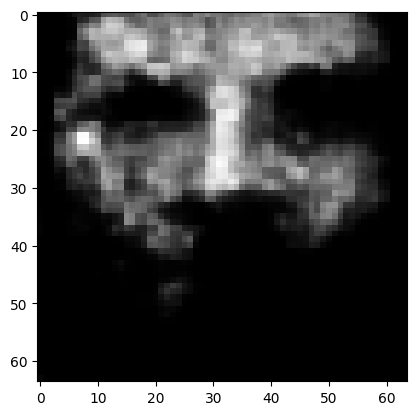

loss(generator):  13.7391939163208
loss(generator):  13.036531448364258
loss(generator):  12.677124977111816
loss(generator):  12.393997192382812
loss(generator):  12.038640975952148
loss(generator):  11.599177360534668
loss(generator):  11.201739311218262
loss(generator):  10.680509567260742
loss(generator):  9.8787260055542
loss(generator):  9.301563262939453
loss(generator):  8.88603401184082
loss(generator):  8.491395950317383
loss(generator):  8.0941801071167
loss(generator):  7.60525369644165
loss(generator):  6.822044849395752
loss(generator):  5.864022731781006
loss(generator):  5.611125946044922
loss(generator):  5.274050235748291
loss(generator):  5.010686874389648
loss(generator):  4.66109037399292
loss(generator):  4.225265026092529
loss(generator):  3.8037912845611572
loss(generator):  3.333001136779785
loss(generator):  2.9470973014831543
loss(generator):  2.537734031677246
loss(generator):  2.232321262359619
loss(generator):  2.048999786376953
loss(generator):  1.9027013

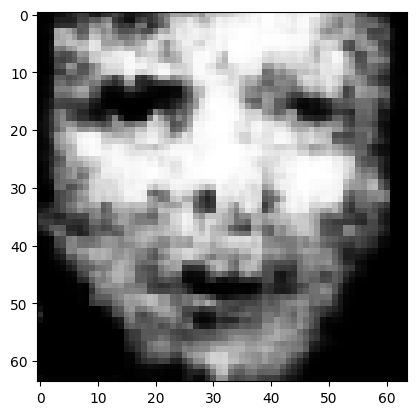

loss(generator):  1.0837974548339844
loss(generator):  1.0836554765701294
loss(generator):  1.0835165977478027
loss(generator):  1.0833828449249268
loss(generator):  1.0832436084747314
loss(generator):  1.083106279373169
loss(generator):  1.0829764604568481
loss(generator):  1.0828478336334229
loss(generator):  1.0827217102050781
loss(generator):  1.0825934410095215
loss(generator):  1.0824682712554932
loss(generator):  1.0823447704315186
loss(generator):  1.0822207927703857
loss(generator):  1.0821014642715454
loss(generator):  1.0819817781448364
loss(generator):  1.0818647146224976
loss(generator):  1.0817512273788452
loss(generator):  1.0816377401351929
loss(generator):  1.0815281867980957
loss(generator):  1.0814176797866821
loss(generator):  1.081307053565979
loss(generator):  1.0811994075775146
loss(generator):  1.0810903310775757
loss(generator):  1.0809855461120605
loss(generator):  1.0808801651000977
loss(generator):  1.0807774066925049
loss(generator):  1.080675721168518
loss

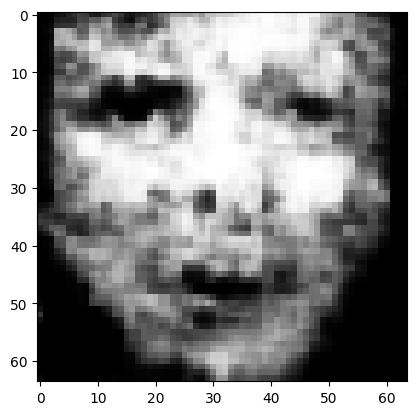

loss(generator):  1.0728085041046143
loss(generator):  1.0727921724319458
loss(generator):  1.0727760791778564
loss(generator):  1.0727604627609253
loss(generator):  1.0727444887161255
loss(generator):  1.0727288722991943
loss(generator):  1.0727121829986572
loss(generator):  1.0726957321166992
loss(generator):  1.0726795196533203
loss(generator):  1.0726635456085205
loss(generator):  1.0726479291915894
loss(generator):  1.0726323127746582
loss(generator):  1.0726165771484375
loss(generator):  1.072601318359375
loss(generator):  1.0725858211517334
loss(generator):  1.0725711584091187
loss(generator):  1.0725558996200562
loss(generator):  1.0725412368774414
loss(generator):  1.0725274085998535
loss(generator):  1.0725135803222656
loss(generator):  1.0724997520446777
loss(generator):  1.0724856853485107
loss(generator):  1.072472333908081
loss(generator):  1.0724589824676514
loss(generator):  1.0724459886550903
loss(generator):  1.0724327564239502
loss(generator):  1.0724197626113892
los

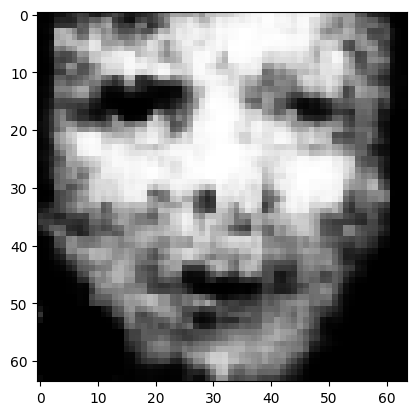

loss(generator):  1.0713862180709839
loss(generator):  1.0713839530944824
loss(generator):  1.0713820457458496
loss(generator):  1.0713796615600586
loss(generator):  1.0713778734207153
loss(generator):  1.0713757276535034
loss(generator):  1.071373701095581
loss(generator):  1.0713720321655273
loss(generator):  1.0713698863983154
loss(generator):  1.071367859840393
loss(generator):  1.0713660717010498
loss(generator):  1.0713642835617065
loss(generator):  1.0713623762130737
loss(generator):  1.0713603496551514
loss(generator):  1.0713584423065186
loss(generator):  1.0713567733764648
loss(generator):  1.071354866027832
loss(generator):  1.0713528394699097
loss(generator):  1.0713510513305664
loss(generator):  1.0713492631912231
loss(generator):  1.0713478326797485
loss(generator):  1.0713459253311157
loss(generator):  1.071344256401062
loss(generator):  1.0713425874710083
loss(generator):  1.0713406801223755
loss(generator):  1.0713391304016113
loss(generator):  1.0713376998901367
loss(

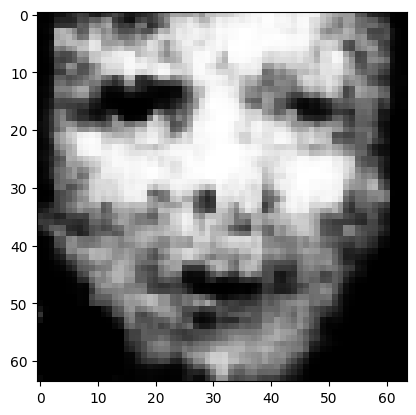

loss(generator):  1.0712016820907593
loss(generator):  1.0712015628814697
loss(generator):  1.0712013244628906
loss(generator):  1.0712010860443115
loss(generator):  1.0712004899978638
loss(generator):  1.0712003707885742
loss(generator):  1.0712001323699951
loss(generator):  1.0711997747421265
loss(generator):  1.0711995363235474
loss(generator):  1.0711992979049683
loss(generator):  1.0711990594863892
loss(generator):  1.0711989402770996
loss(generator):  1.0711984634399414
loss(generator):  1.0711984634399414
loss(generator):  1.0711979866027832
loss(generator):  1.071197748184204
loss(generator):  1.0711976289749146
loss(generator):  1.0711973905563354
loss(generator):  1.071197271347046
loss(generator):  1.0711969137191772
loss(generator):  1.0711965560913086
loss(generator):  1.07119619846344
loss(generator):  1.0711963176727295
loss(generator):  1.0711958408355713
loss(generator):  1.0711956024169922
loss(generator):  1.0711956024169922
loss(generator):  1.071195363998413
loss(g

In [25]:
attack0 = torch.normal(0, 1, size=(1,64)).to(device)
attack0.requires_grad_(True)
optimize_z_eps(attack0, 1000, 1, 0.001, 0.99, target=0)

In [26]:
torch.softmax(classifier(decoder(attack0)),-1)

tensor([[8.5804e-01, 2.1626e-04, 1.4568e-03, 2.5422e-04, 1.2752e-04, 1.2744e-05,
         5.0058e-04, 8.4901e-04, 2.0182e-04, 1.6478e-03, 5.6610e-06, 1.4552e-02,
         1.8137e-03, 7.1259e-04, 8.4204e-07, 2.2771e-05, 1.0096e-02, 5.8883e-06,
         5.5550e-05, 2.9711e-06, 1.3454e-02, 1.3618e-03, 9.7774e-05, 1.5613e-04,
         4.2702e-03, 2.4915e-03, 7.5064e-05, 1.3949e-03, 2.5361e-03, 1.4229e-05,
         1.2187e-03, 3.1416e-05, 7.8035e-04, 5.2622e-05, 5.9139e-03, 1.2915e-06,
         2.3664e-02, 4.2530e-02, 9.3588e-04, 8.4413e-03]],
       grad_fn=<SoftmaxBackward>)

loss(generator):  7.887569427490234


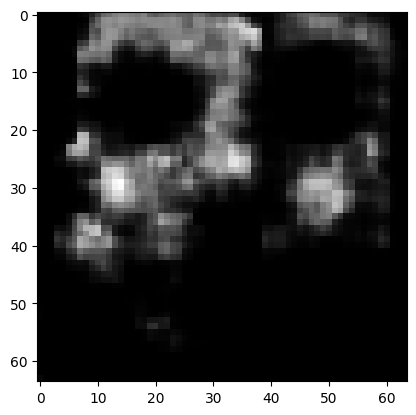

loss(generator):  7.446618556976318
loss(generator):  7.142589092254639
loss(generator):  6.8256731033325195
loss(generator):  6.373896598815918
loss(generator):  6.0446977615356445
loss(generator):  5.806614398956299
loss(generator):  5.591134071350098
loss(generator):  5.364293575286865
loss(generator):  5.122893333435059
loss(generator):  4.87693452835083
loss(generator):  4.6445770263671875
loss(generator):  4.426244258880615
loss(generator):  4.260481834411621
loss(generator):  4.142387390136719
loss(generator):  4.049245357513428
loss(generator):  3.920119047164917
loss(generator):  3.8101069927215576
loss(generator):  3.6936347484588623
loss(generator):  3.6005375385284424
loss(generator):  3.463592052459717
loss(generator):  3.3695881366729736
loss(generator):  3.2480857372283936
loss(generator):  3.135737895965576
loss(generator):  3.0301191806793213
loss(generator):  2.9414424896240234
loss(generator):  2.8580799102783203
loss(generator):  2.785879135131836
loss(generator):  

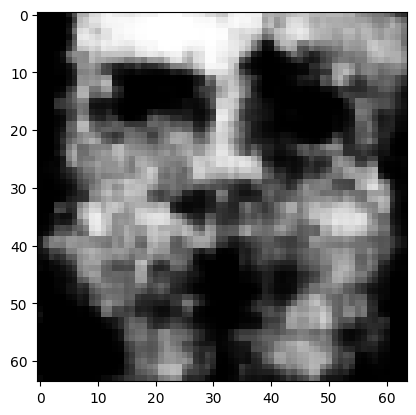

loss(generator):  0.753786027431488
loss(generator):  0.7516317963600159
loss(generator):  0.7498290538787842
loss(generator):  0.7483156323432922
loss(generator):  0.7463352680206299
loss(generator):  0.7444650530815125
loss(generator):  0.742538571357727
loss(generator):  0.7408151626586914
loss(generator):  0.7390959858894348
loss(generator):  0.7372831106185913
loss(generator):  0.7356759309768677
loss(generator):  0.7341902852058411
loss(generator):  0.7325164675712585
loss(generator):  0.7311289310455322
loss(generator):  0.7296067476272583
loss(generator):  0.7281362414360046
loss(generator):  0.7269477248191833
loss(generator):  0.7257438898086548
loss(generator):  0.7243388891220093
loss(generator):  0.7231107354164124
loss(generator):  0.7218058109283447
loss(generator):  0.7205317616462708
loss(generator):  0.7194677591323853
loss(generator):  0.7182410359382629
loss(generator):  0.717067301273346
loss(generator):  0.7159848213195801
loss(generator):  0.7150309085845947
loss

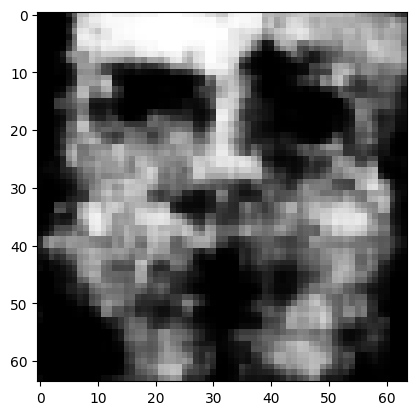

loss(generator):  0.6465709209442139
loss(generator):  0.6464459300041199
loss(generator):  0.6463226675987244
loss(generator):  0.6462089419364929
loss(generator):  0.646079421043396
loss(generator):  0.645964503288269
loss(generator):  0.6458359956741333
loss(generator):  0.6457251906394958
loss(generator):  0.6456006765365601
loss(generator):  0.6454946994781494
loss(generator):  0.6453732252120972
loss(generator):  0.6453025341033936
loss(generator):  0.6451855897903442
loss(generator):  0.6450645923614502
loss(generator):  0.6449622511863708
loss(generator):  0.6448462009429932
loss(generator):  0.6447448134422302
loss(generator):  0.6446318626403809
loss(generator):  0.6445347666740417
loss(generator):  0.6444316506385803
loss(generator):  0.6443219184875488
loss(generator):  0.6442278623580933
loss(generator):  0.6441200971603394
loss(generator):  0.6440281271934509
loss(generator):  0.6439220905303955
loss(generator):  0.6438572406768799
loss(generator):  0.6437557339668274
los

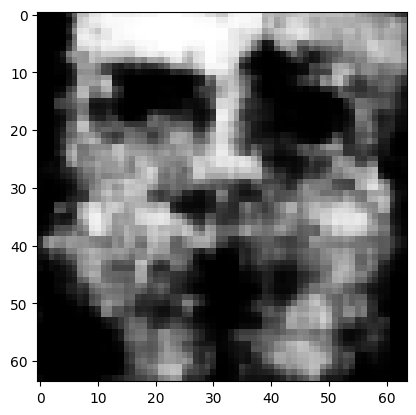

loss(generator):  0.6360664367675781
loss(generator):  0.6360525488853455
loss(generator):  0.636035680770874
loss(generator):  0.6360193490982056
loss(generator):  0.6360039710998535
loss(generator):  0.6359881162643433
loss(generator):  0.6359736323356628
loss(generator):  0.6359562277793884
loss(generator):  0.6359454393386841
loss(generator):  0.6359314322471619
loss(generator):  0.6359151601791382
loss(generator):  0.6359010338783264
loss(generator):  0.6358866691589355
loss(generator):  0.6358720064163208
loss(generator):  0.6358578205108643
loss(generator):  0.6358437538146973
loss(generator):  0.6358302235603333
loss(generator):  0.6358150243759155
loss(generator):  0.635802686214447
loss(generator):  0.6357881426811218
loss(generator):  0.6357765197753906
loss(generator):  0.6357613801956177
loss(generator):  0.6357501149177551
loss(generator):  0.6357390284538269
loss(generator):  0.6357264518737793
loss(generator):  0.6357125043869019
loss(generator):  0.6357002854347229
los

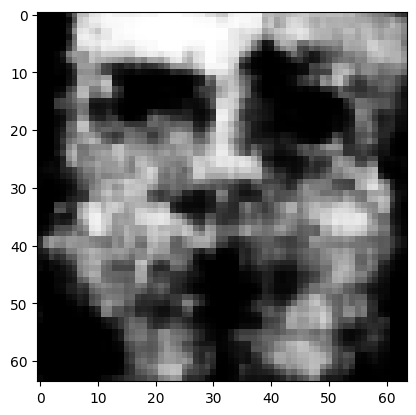

loss(generator):  0.6346755623817444
loss(generator):  0.6346732974052429
loss(generator):  0.6346712112426758
loss(generator):  0.6346689462661743
loss(generator):  0.6346664428710938
loss(generator):  0.6346651911735535
loss(generator):  0.6346628665924072
loss(generator):  0.6346604228019714
loss(generator):  0.6346586346626282
loss(generator):  0.6346564888954163
loss(generator):  0.6346548199653625
loss(generator):  0.6346526741981506
loss(generator):  0.6346508860588074
loss(generator):  0.6346486210823059
loss(generator):  0.6346469521522522
loss(generator):  0.6346453428268433
loss(generator):  0.6346434950828552
loss(generator):  0.6346420049667358
loss(generator):  0.6346398591995239
loss(generator):  0.6346380710601807
loss(generator):  0.6346363425254822
loss(generator):  0.6346347332000732
loss(generator):  0.6346322894096375
loss(generator):  0.6346310973167419
loss(generator):  0.6346292495727539
loss(generator):  0.6346274614334106
loss(generator):  0.6346259117126465
l

In [28]:
attack1 = torch.normal(0, 1, size=(1,64)).to(device)
attack1.requires_grad_(True)
optimize_z_eps(attack1, 1000, 1, 0.0001, 0.99, target=1)

In [29]:
torch.softmax(classifier(decoder(attack1)),-1)

tensor([[2.9333e-04, 5.8449e-01, 5.2430e-05, 5.1353e-04, 6.4132e-05, 1.4071e-07,
         2.0303e-04, 3.8163e-06, 1.2026e-05, 1.3133e-05, 4.8615e-04, 4.0717e-04,
         3.0304e-02, 6.8236e-03, 3.4575e-04, 1.6053e-02, 1.5995e-04, 1.1493e-05,
         1.7092e-03, 4.1366e-03, 2.8560e-02, 2.3807e-02, 6.4190e-08, 1.2945e-02,
         1.8255e-04, 3.0295e-07, 1.0459e-03, 4.7858e-04, 1.2344e-02, 1.3559e-02,
         5.8347e-02, 4.5404e-05, 2.6258e-03, 1.0117e-01, 3.5511e-05, 9.5323e-03,
         1.4672e-03, 1.8275e-03, 1.0681e-02, 7.5265e-02]],
       grad_fn=<SoftmaxBackward>)

loss(generator):  11.138382911682129


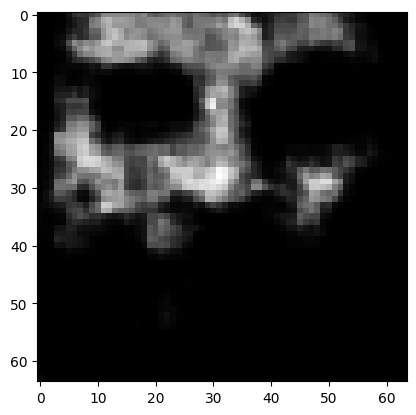

loss(generator):  10.028882026672363
loss(generator):  8.963542938232422
loss(generator):  8.050070762634277
loss(generator):  7.268065929412842
loss(generator):  6.602237224578857
loss(generator):  6.057486057281494
loss(generator):  5.506012916564941
loss(generator):  4.848082542419434
loss(generator):  4.248854160308838
loss(generator):  3.4342496395111084
loss(generator):  2.689370632171631
loss(generator):  2.041715621948242
loss(generator):  1.5889981985092163
loss(generator):  1.2612171173095703
loss(generator):  1.0684595108032227
loss(generator):  0.9061635732650757
loss(generator):  0.764469563961029
loss(generator):  0.6500188112258911
loss(generator):  0.5728387832641602
loss(generator):  0.5091233849525452
loss(generator):  0.4525260925292969
loss(generator):  0.41060274839401245
loss(generator):  0.37735047936439514
loss(generator):  0.34671682119369507
loss(generator):  0.3215456008911133
loss(generator):  0.3027305006980896
loss(generator):  0.287454754114151
loss(gener

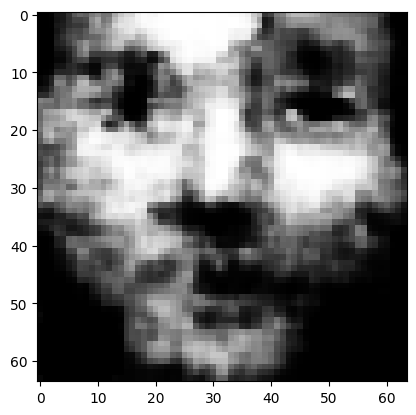

loss(generator):  0.10983848571777344
loss(generator):  0.10978762805461884
loss(generator):  0.10973713546991348
loss(generator):  0.10968766361474991
loss(generator):  0.10964113473892212
loss(generator):  0.10959532856941223
loss(generator):  0.10955072939395905
loss(generator):  0.1095082089304924
loss(generator):  0.1094638854265213
loss(generator):  0.10942162573337555
loss(generator):  0.10938095301389694
loss(generator):  0.10933998227119446
loss(generator):  0.10929964482784271
loss(generator):  0.10926149785518646
loss(generator):  0.10922135412693024
loss(generator):  0.10918203741312027
loss(generator):  0.1091446578502655
loss(generator):  0.10910584032535553
loss(generator):  0.1090676411986351
loss(generator):  0.10903149098157883
loss(generator):  0.10899446904659271
loss(generator):  0.10895711928606033
loss(generator):  0.10892180353403091
loss(generator):  0.1088862270116806
loss(generator):  0.10885077714920044
loss(generator):  0.1088169664144516
loss(generator):  

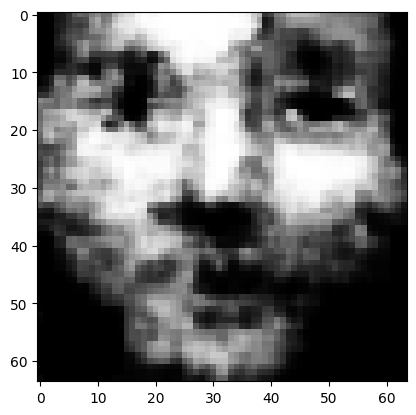

loss(generator):  0.10609206557273865
loss(generator):  0.10608688741922379
loss(generator):  0.10608193278312683
loss(generator):  0.10607711970806122
loss(generator):  0.10607181489467621
loss(generator):  0.10606707632541656
loss(generator):  0.10606247931718826
loss(generator):  0.10605761408805847
loss(generator):  0.10605297237634659
loss(generator):  0.10604836046695709
loss(generator):  0.10604360699653625
loss(generator):  0.10603885352611542
loss(generator):  0.1060345470905304
loss(generator):  0.10603012889623642
loss(generator):  0.10602547228336334
loss(generator):  0.10602140426635742
loss(generator):  0.10601696372032166
loss(generator):  0.10601240396499634
loss(generator):  0.10600844025611877
loss(generator):  0.10600398480892181
loss(generator):  0.10599987208843231
loss(generator):  0.1059957891702652
loss(generator):  0.10599155724048615
loss(generator):  0.10598744451999664
loss(generator):  0.10598356276750565
loss(generator):  0.1059795469045639
loss(generator)

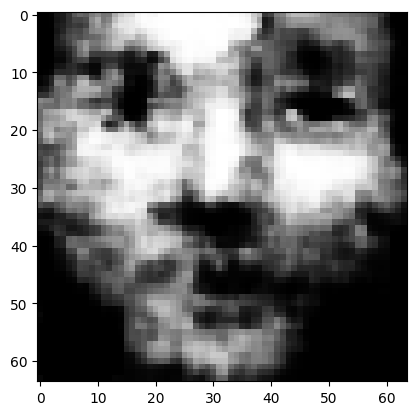

loss(generator):  0.10565251111984253
loss(generator):  0.10565176606178284
loss(generator):  0.10565125942230225
loss(generator):  0.1056506410241127
loss(generator):  0.10564989596605301
loss(generator):  0.10564938932657242
loss(generator):  0.10564853996038437
loss(generator):  0.10564801841974258
loss(generator):  0.10564727336168289
loss(generator):  0.10564665496349335
loss(generator):  0.10564613342285156
loss(generator):  0.10564562678337097
loss(generator):  0.10564464330673218
loss(generator):  0.1056443601846695
loss(generator):  0.10564383864402771
loss(generator):  0.10564297437667847
loss(generator):  0.10564269125461578
loss(generator):  0.10564182698726654
loss(generator):  0.10564130544662476
loss(generator):  0.10564102232456207
loss(generator):  0.10564015060663223
loss(generator):  0.1056397557258606
loss(generator):  0.10563923418521881
loss(generator):  0.10563893616199493
loss(generator):  0.10563819110393524
loss(generator):  0.1056375503540039
loss(generator):

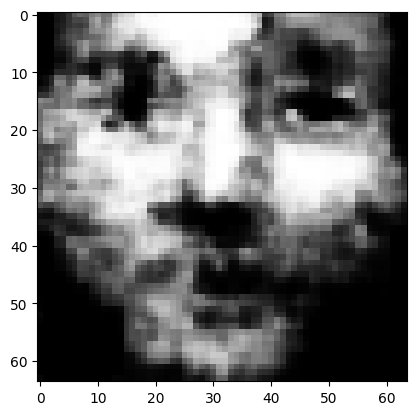

loss(generator):  0.10559415817260742
loss(generator):  0.10559405386447906
loss(generator):  0.10559394210577011
loss(generator):  0.1055937260389328
loss(generator):  0.1055937334895134
loss(generator):  0.10559362173080444
loss(generator):  0.10559341311454773
loss(generator):  0.10559342056512833
loss(generator):  0.10559319704771042
loss(generator):  0.10559318959712982
loss(generator):  0.10559319704771042
loss(generator):  0.1055929958820343
loss(generator):  0.1055929958820343
loss(generator):  0.10559288412332535
loss(generator):  0.10559278726577759
loss(generator):  0.10559280216693878
loss(generator):  0.10559269040822983
loss(generator):  0.10559268295764923
loss(generator):  0.10559246689081192
loss(generator):  0.10559237003326416
loss(generator):  0.10559237748384476
loss(generator):  0.10559238493442535
loss(generator):  0.105592280626297
loss(generator):  0.105592280626297
loss(generator):  0.10559205710887909
loss(generator):  0.10559205710887909
loss(generator):  0.

In [30]:
attack2 = torch.normal(0, 1, size=(1,64)).to(device)
attack2.requires_grad_(True)
optimize_z_eps(attack2, 1000, 1, 0.0001, 0.99, target=2)

In [31]:
torch.softmax(classifier(decoder(attack2)),-1)

tensor([[6.2049e-08, 6.5324e-06, 9.6302e-01, 3.2850e-03, 1.3504e-06, 1.0794e-06,
         1.8474e-04, 1.2976e-04, 2.8532e-04, 2.1821e-04, 2.0169e-03, 1.0227e-06,
         1.3633e-05, 2.0636e-04, 6.5493e-06, 3.1009e-05, 2.3427e-04, 4.2814e-09,
         4.0592e-05, 8.2281e-04, 3.4052e-03, 6.5951e-03, 1.0498e-05, 2.6007e-06,
         1.5364e-04, 9.6610e-05, 7.9158e-05, 7.7022e-03, 1.9927e-03, 3.6064e-05,
         3.8397e-05, 3.5940e-07, 2.4399e-04, 7.2774e-04, 1.1534e-04, 8.1874e-07,
         2.2872e-03, 3.4391e-03, 7.8793e-04, 1.7769e-03]],
       grad_fn=<SoftmaxBackward>)

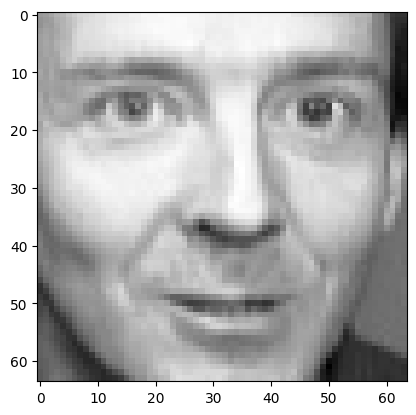

In [45]:
tensor_to_picture(test_data[29].detach().cpu().numpy()[0][0])

loss(generator):  11.671854019165039


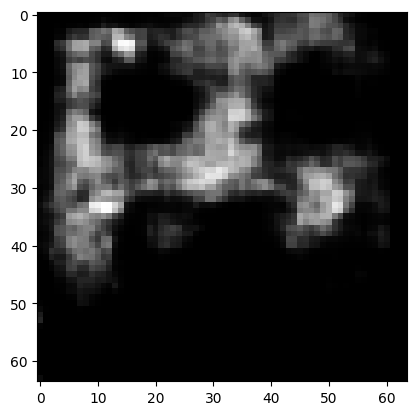

loss(generator):  10.202238082885742
loss(generator):  9.17640209197998
loss(generator):  7.905200481414795
loss(generator):  6.420611381530762
loss(generator):  5.79586935043335
loss(generator):  5.330174446105957
loss(generator):  4.9445085525512695
loss(generator):  4.488529205322266
loss(generator):  4.105235576629639
loss(generator):  3.6912598609924316
loss(generator):  3.094219446182251
loss(generator):  2.537961959838867
loss(generator):  2.0704195499420166
loss(generator):  1.7999582290649414
loss(generator):  1.601278305053711
loss(generator):  1.448557734489441
loss(generator):  1.3577226400375366
loss(generator):  1.2954530715942383
loss(generator):  1.2482589483261108
loss(generator):  1.1984338760375977
loss(generator):  1.156272530555725
loss(generator):  1.1223509311676025
loss(generator):  1.0904299020767212
loss(generator):  1.0586185455322266
loss(generator):  1.0333259105682373
loss(generator):  1.0117621421813965
loss(generator):  0.9908256530761719
loss(generator)

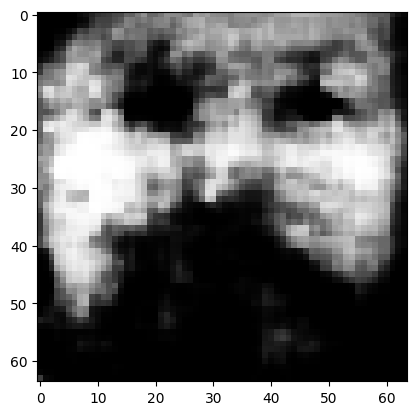

loss(generator):  0.5717037916183472
loss(generator):  0.5713983774185181
loss(generator):  0.5711185336112976
loss(generator):  0.5708299875259399
loss(generator):  0.5705713033676147
loss(generator):  0.5702857971191406
loss(generator):  0.570035457611084
loss(generator):  0.5697529911994934
loss(generator):  0.5695083737373352
loss(generator):  0.5692296028137207
loss(generator):  0.5689963698387146
loss(generator):  0.5687260627746582
loss(generator):  0.5684939622879028
loss(generator):  0.5682274699211121
loss(generator):  0.5679913759231567
loss(generator):  0.5677127838134766
loss(generator):  0.5674614906311035
loss(generator):  0.5671861171722412
loss(generator):  0.5669441223144531
loss(generator):  0.566679835319519
loss(generator):  0.5664392709732056
loss(generator):  0.5661844611167908
loss(generator):  0.5659458637237549
loss(generator):  0.5656924247741699
loss(generator):  0.5654587745666504
loss(generator):  0.5652140378952026
loss(generator):  0.5649850964546204
los

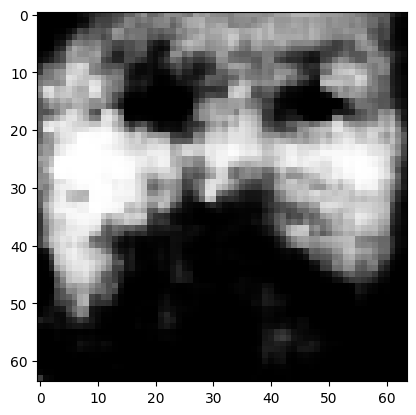

loss(generator):  0.5459885597229004
loss(generator):  0.5459585189819336
loss(generator):  0.5459153652191162
loss(generator):  0.5458836555480957
loss(generator):  0.5458503365516663
loss(generator):  0.5458089709281921
loss(generator):  0.545775294303894
loss(generator):  0.5457421541213989
loss(generator):  0.5457122921943665
loss(generator):  0.545671284198761
loss(generator):  0.5456418395042419
loss(generator):  0.5456074476242065
loss(generator):  0.5455725193023682
loss(generator):  0.5455423593521118
loss(generator):  0.5455068945884705
loss(generator):  0.5454792380332947
loss(generator):  0.5454443097114563
loss(generator):  0.5454187393188477
loss(generator):  0.5453820824623108
loss(generator):  0.5453552007675171
loss(generator):  0.5453243255615234
loss(generator):  0.5452919602394104
loss(generator):  0.5452678203582764
loss(generator):  0.5452338457107544
loss(generator):  0.5452065467834473
loss(generator):  0.545180082321167
loss(generator):  0.5451465845108032
loss

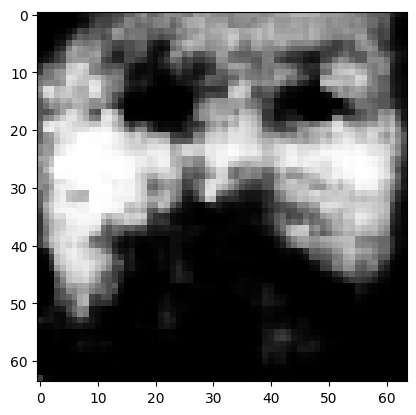

loss(generator):  0.5429049134254456
loss(generator):  0.5429008603096008
loss(generator):  0.5428971648216248
loss(generator):  0.5428920984268188
loss(generator):  0.5428875684738159
loss(generator):  0.5428825616836548
loss(generator):  0.5428783893585205
loss(generator):  0.5428745746612549
loss(generator):  0.5428701639175415
loss(generator):  0.5428652763366699
loss(generator):  0.5428615808486938
loss(generator):  0.5428580641746521
loss(generator):  0.5428539514541626
loss(generator):  0.5428500771522522
loss(generator):  0.5428463816642761
loss(generator):  0.5428414344787598
loss(generator):  0.5428378582000732
loss(generator):  0.5428342223167419
loss(generator):  0.5428307056427002
loss(generator):  0.5428261160850525
loss(generator):  0.5428228378295898
loss(generator):  0.5428189635276794
loss(generator):  0.5428149104118347
loss(generator):  0.5428116917610168
loss(generator):  0.5428074598312378
loss(generator):  0.5428040623664856
loss(generator):  0.542800784111023
lo

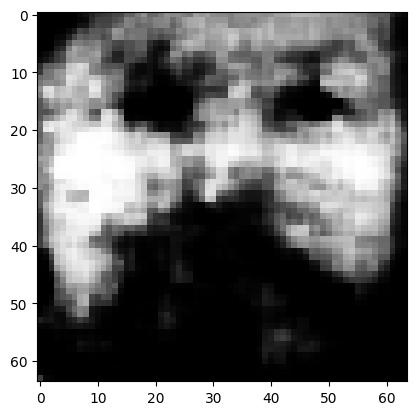

loss(generator):  0.5425113439559937
loss(generator):  0.5425106287002563
loss(generator):  0.5425103902816772
loss(generator):  0.542509913444519
loss(generator):  0.5425094366073608
loss(generator):  0.5425090193748474
loss(generator):  0.5425076484680176
loss(generator):  0.5425074696540833
loss(generator):  0.5425071716308594
loss(generator):  0.5425065159797668
loss(generator):  0.5425056219100952
loss(generator):  0.5425055027008057
loss(generator):  0.5425049662590027
loss(generator):  0.5425044298171997
loss(generator):  0.542504072189331
loss(generator):  0.5425037145614624
loss(generator):  0.5425029993057251
loss(generator):  0.5425023436546326
loss(generator):  0.5425017476081848
loss(generator):  0.5425010919570923
loss(generator):  0.542500376701355
loss(generator):  0.5425000190734863
loss(generator):  0.542499840259552
loss(generator):  0.5424990653991699
loss(generator):  0.5424982309341431
loss(generator):  0.5424979329109192
loss(generator):  0.5424973368644714
loss(

In [32]:
attack3 = torch.normal(0, 1, size=(1,64)).to(device)
attack3.requires_grad_(True)
optimize_z_eps(attack3, 1000, 1, 0.0001, 0.99, target=3)